## Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
#Create a path to where your data is stored.
path = r'C:\Users\IVON6\ClimateWins'

In [5]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))

In [6]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,...,5,0.88,1.00,0.45,0.34,0,4.70,8.50,6.00,10.90
1,19600102,1,6,2.10,0.84,1.02,0.36,1.05,0,1.10,...,7,0.91,1.00,0.25,0.84,0,0.70,8.90,5.60,12.10
2,19600103,1,8,2.10,0.90,1.02,0.18,0.30,0,0.00,...,7,0.91,1.01,0.17,0.08,0,0.10,10.50,8.10,12.90
3,19600104,1,3,2.10,0.92,1.02,0.58,0.00,0,4.10,...,7,0.86,1.02,0.13,0.98,0,0.00,7.40,7.30,10.60
4,19600105,1,6,2.10,0.95,1.02,0.65,0.14,0,5.40,...,3,0.80,1.03,0.46,0.00,0,5.70,5.70,3.00,8.40


In [7]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [8]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
df.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.50,3.70,2.40,9.30,10.00,0.80,10.60,7.90,-0.60,9.50,7.60,6.90,4.90,7.80,-5.90,4.20,10.00,8.50
1,19600102,1,6.10,2.90,2.30,7.70,8.20,1.60,6.10,7.70,2.10,8.60,9.80,6.20,3.40,12.20,-9.50,4.00,9.50,8.90
2,19600103,1,8.50,3.10,2.70,6.80,7.10,0.70,8.40,6.50,4.60,6.90,8.60,5.80,1.90,10.20,-9.50,2.40,10.30,10.50
3,19600104,1,6.30,2.00,2.00,6.70,6.80,-0.10,9.40,5.80,3.20,7.00,10.30,3.90,3.00,10.80,-11.50,1.20,11.20,7.40
4,19600105,1,3.00,2.00,2.50,8.00,7.70,0.40,8.90,5.40,3.60,8.10,12.10,1.80,3.70,9.90,-9.30,3.30,11.40,5.70


In [10]:
#create a scaler object using StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#create new df with scaled data

df_scaled_temp_mean = pd.DataFrame(scaler.fit_transform(df))
df_scaled_temp_mean.columns = df.columns

df_scaled_temp_mean.head()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,-1.71,-1.60,-0.53,-1.02,-1.10,-0.11,-0.11,-0.93,-0.11,-0.18,-1.37,-0.10,-0.99,-0.27,-0.19,-1.28,-0.12,-0.39,-0.26,-0.67
1,-1.71,-1.60,-0.58,-1.11,-1.11,-0.37,-0.37,-0.83,-0.89,-0.21,-1.04,-0.23,-0.69,-0.35,-0.37,-0.54,-0.65,-0.42,-0.34,-0.55
2,-1.71,-1.60,-0.26,-1.08,-1.06,-0.51,-0.53,-0.94,-0.49,-0.39,-0.74,-0.49,-0.85,-0.40,-0.55,-0.88,-0.65,-0.62,-0.21,-0.07
3,-1.71,-1.60,-0.56,-1.21,-1.15,-0.53,-0.58,-1.04,-0.32,-0.49,-0.91,-0.47,-0.62,-0.64,-0.42,-0.78,-0.94,-0.76,-0.07,-1.00
4,-1.71,-1.60,-1.00,-1.21,-1.09,-0.32,-0.44,-0.98,-0.40,-0.55,-0.86,-0.31,-0.38,-0.91,-0.33,-0.93,-0.62,-0.50,-0.04,-1.51


In [11]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Drop the columns that are not necessary and those are just in one data set:

df2 = df.drop(columns=['DATE', 'MONTH','GDANSK_temp_mean', 'ROMA_temp_mean', 'TOURS_temp_mean'])
df_scaled2 = df_scaled_temp_mean.drop(columns=['DATE', 'MONTH','GDANSK_temp_mean', 'ROMA_temp_mean', 'TOURS_temp_mean'])
answers2 = answers.drop(columns=['DATE'])

In [13]:
# Set X (features) and y (target labels) [NOT SCALED]
X = df2
y = answers2

In [14]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.multioutput import MultiOutputClassifier

#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #Accomodate a multilabel answer set
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #Change this line to accomodate multilabel
    test_acc[i] = knn.score(X_test, np.array(y_test)) #Change this line to accomodate multilabel

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


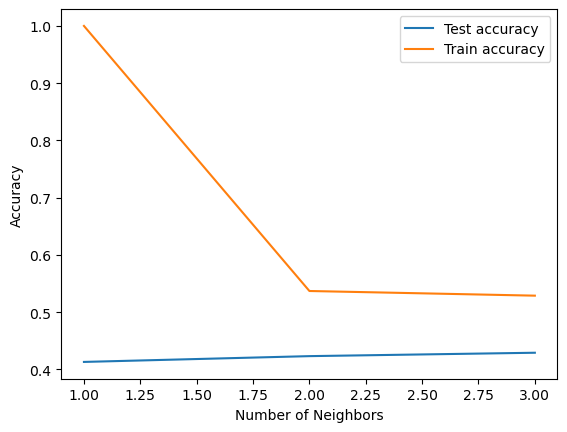

In [16]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Training Accuracy: As shown in the graph, with k=1, the model fits the training data perfectly, achieving a 100% accuracy. This suggests that the model is overfitting on the training data when k=1. However, as the number of neighbors increases (k=2 or k=3), the training accuracy decreases, which is expected because the model now averages over more neighbors.
#### Testing Accuracy: The testing accuracy stays fairly constant. This indicates that increasing the number of neighbors from 1 to 3 doesn’t improve the generalization performance of the model significantly for the test set..

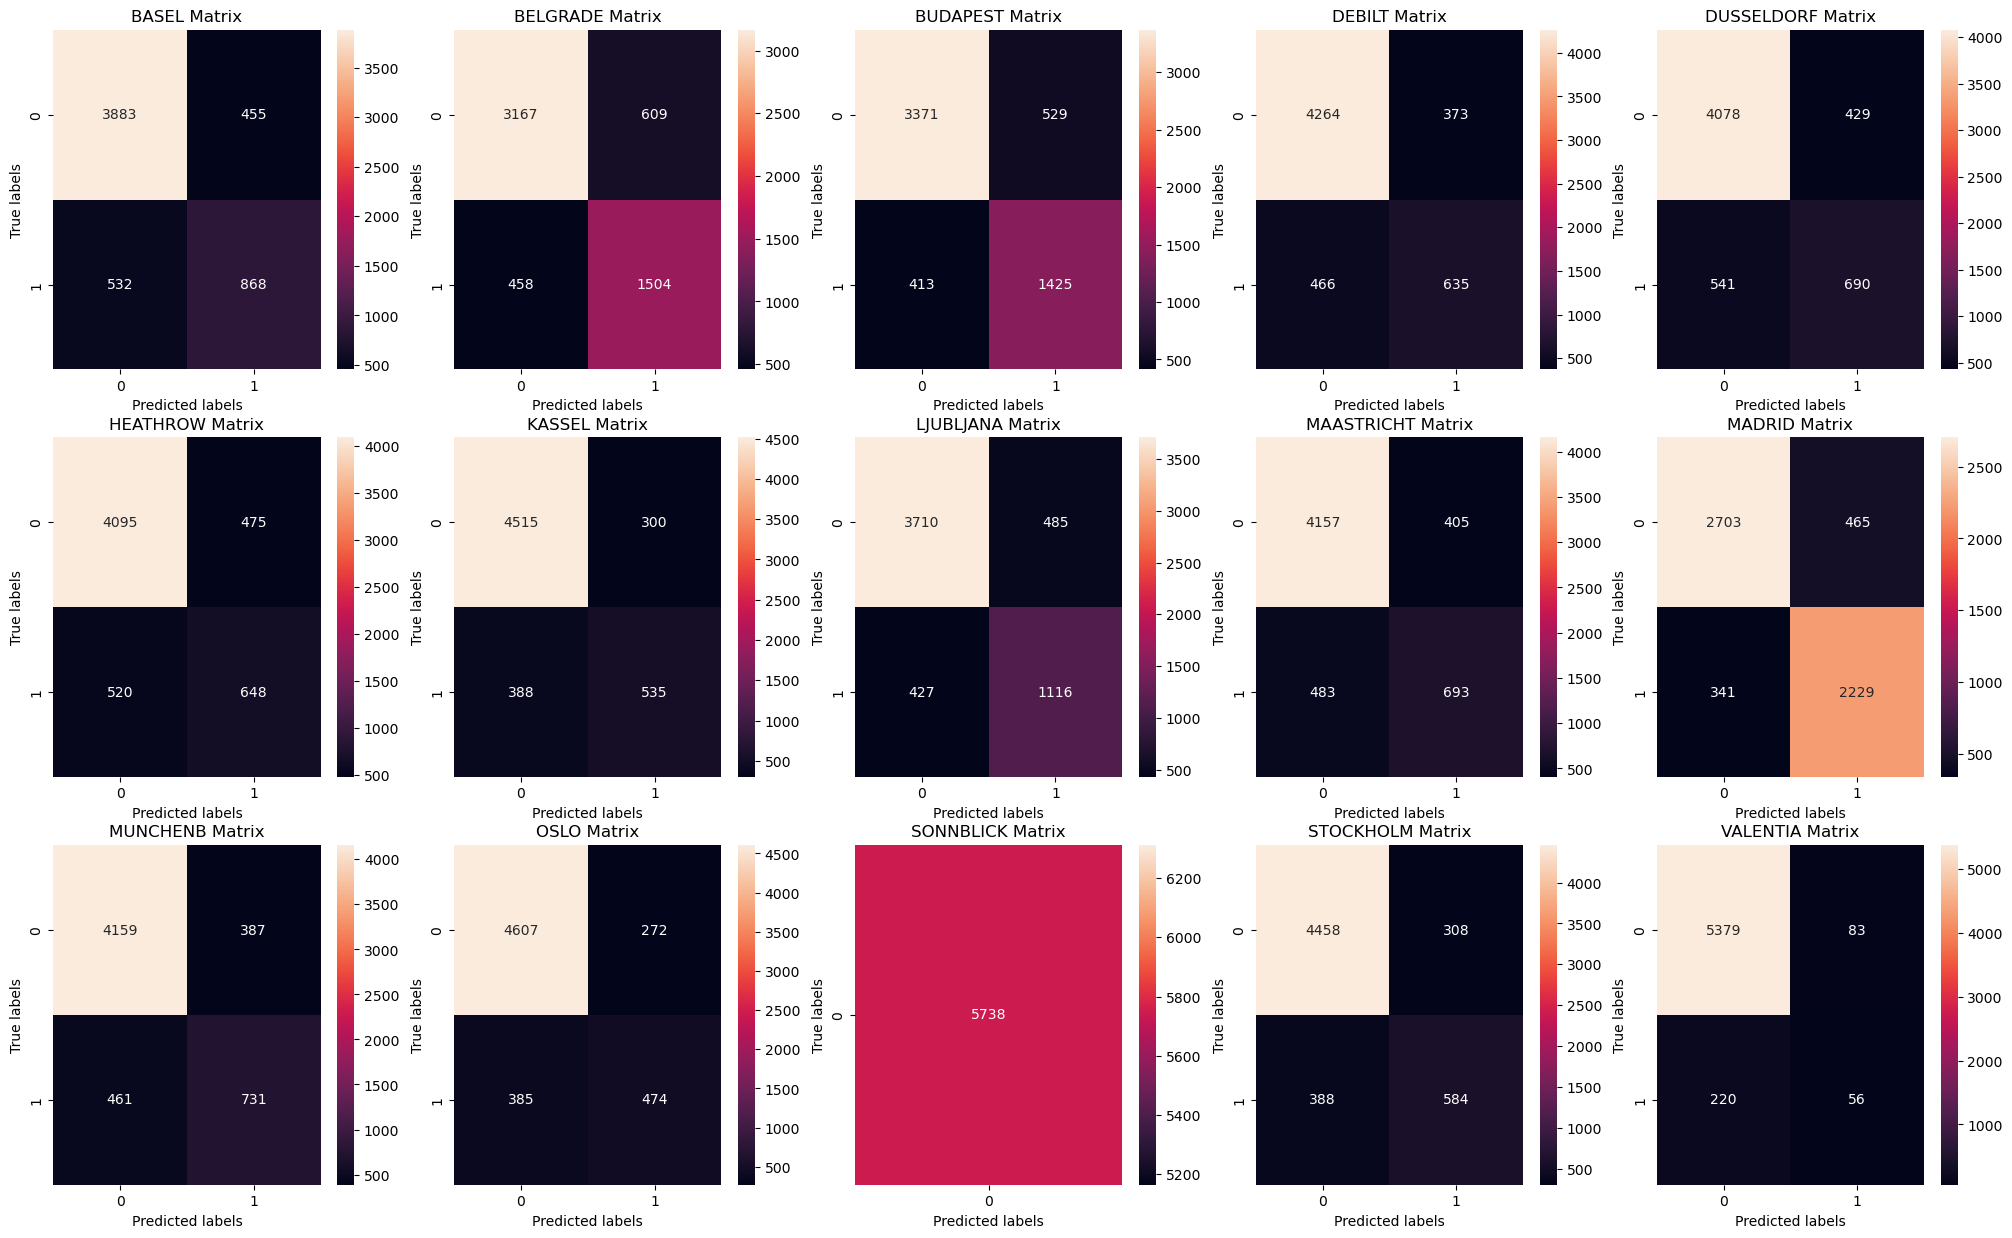

In [18]:
locations = list({x.split("_")[0] for x in df2.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

#Plot multilabel confusion matrix
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

plt.show()

In [19]:
answers['SONNBLICK_pleasant_weather'].value_counts(dropna=False)

SONNBLICK_pleasant_weather
0    22950
Name: count, dtype: int64

In [20]:
answers['VALENTIA_pleasant_weather'].value_counts(dropna=False)

VALENTIA_pleasant_weather
0    21776
1     1174
Name: count, dtype: int64

#### Accuracy for Different Stations:##### As observed, stations such as SONNBLICK have an almost perfect accuracy of 1.0, which could suggest the model overfits or the data for that particular station is very predictable. VALENTIA also has a very high accuracy, around 95%, followed by OSLO (89%), STOCKHOLM (88%), and KASSEL (88%).
#### Less Accurate Stations:
##### Stations like BELGRADE and BUDAPEST have lower accuracy (80%-83%), which might suggest that these stations have more complex or noisy weather patterns, making it harder for the KNN algorithm to predict accurately.
#### Overfitting:
##### Looking at the train/test accuracy (Train: 100%, Test: 41%-42%) and confusion matrices, it is clear the model is likely overfitting for certain stations like SONNBLICK and VALENTIA, which show high accuracies.

### Calculate Accuracy for All Weather Stations

In [66]:
# Loop through each weather station and calculate the accuracy for each one:

for count, location in enumerate(locations):
    accuracy = accuracy_score(y_test[location + '_pleasant_weather'], y_pred[:, count])
    print(f'Accuracy for {location}: {accuracy:.2f}')

Accuracy for BASEL: 0.83
Accuracy for BELGRADE: 0.81
Accuracy for BUDAPEST: 0.84
Accuracy for DEBILT: 0.85
Accuracy for DUSSELDORF: 0.83
Accuracy for HEATHROW: 0.83
Accuracy for KASSEL: 0.88
Accuracy for LJUBLJANA: 0.84
Accuracy for MAASTRICHT: 0.85
Accuracy for MADRID: 0.86
Accuracy for MUNCHENB: 0.85
Accuracy for OSLO: 0.89
Accuracy for SONNBLICK: 1.00
Accuracy for STOCKHOLM: 0.88
Accuracy for VALENTIA: 0.95


##### Overall Accuracy (for All Stations Combined)

In [69]:
# Flatten the arrays (in case they are multi-dimensional) and calculate overall accuracy
overall_accuracy = accuracy_score(y_test.values.ravel(), y_pred.ravel())

print(f'Overall Accuracy: {overall_accuracy:.2f}')

Overall Accuracy: 0.87


#### Conclusion:

##### Accuracy:
##### The overall accuracy of the model is 87%. This indicates that the model performs reasonably well in predicting pleasant weather across different stations.
##### Overfitting:
##### There is overfitting when k=1, as the training accuracy is 100%, and the test accuracy is only 41%. Increasing k reduces the overfitting but does not drastically improve test accuracy.
##### Stations & Accuracy:
##### Some stations like SONNBLICK, VALENTIA, and OSLO have a high accuracy, possibly due to cleaner or more predictable weather data. Meanwhile, stations like BELGRADE and BUDAPEST have lower accuracy, indicating more variability in their weather patterns, which makes predictions harder.

In [75]:
# sources:
# LinkedIn Login, Sign in. (n.d.). LinkedIn. https://www.linkedin.com/pulse/basics-decision-tree-python-omkar-sutar/
# top_k_accuracy_score. (2024). Scikit-Learn. https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.top_k_accuracy_score.html